In [84]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import math

In [85]:


# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

In [86]:
message_count = data.groupby('user').size().reset_index(name='message_count')
message_count = message_count.sort_values(by='message_count', ascending=False)

message_count.describe()

,message_count
count,10915.000000
mean,34.240953
std,347.785900
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,23204.000000


In [87]:
message_count.head(50)

,user,message_count
1801,Martin_Gales,23204
6591,klimzaa,10644
2611,StreamElements,10547
52,1206paul_,9451
1371,IvanOnMyOwn,8065
3721,balintboss,7453
5291,fyodor_m_d1821,7443
8028,oJov,5883
519,Banties1g,5636
2824,Typhu25,5373


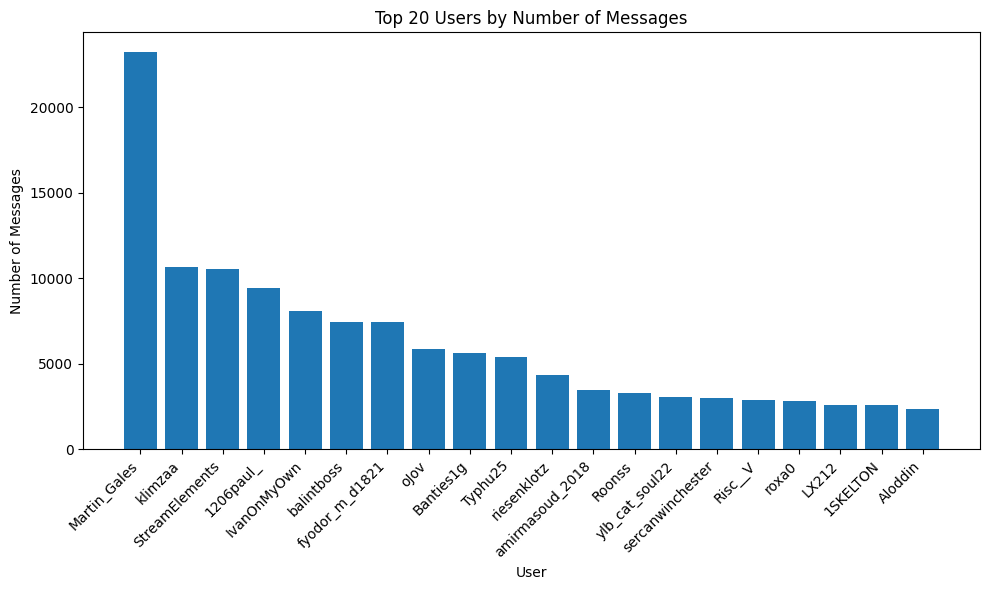

In [88]:
# Select the top 20 users by message count
top_users = message_count.head(20)

plt.figure(figsize=(10,6))
plt.bar(top_users['user'], top_users['message_count'])

# Adding labels and title
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title('Top 20 Users by Number of Messages')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



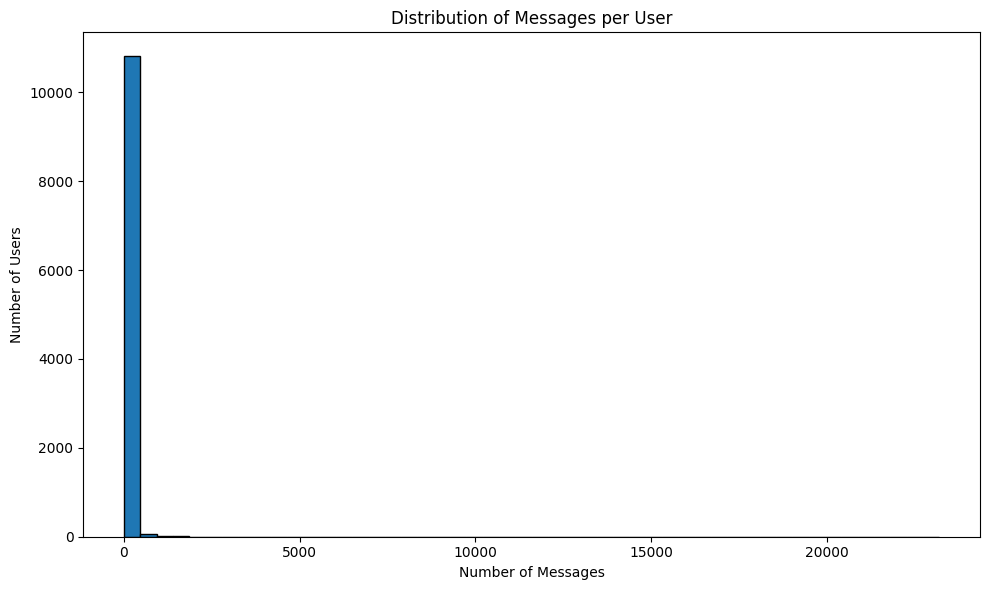

In [89]:
plt.figure(figsize=(10,6))
plt.hist(message_count['message_count'], bins=50, edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()


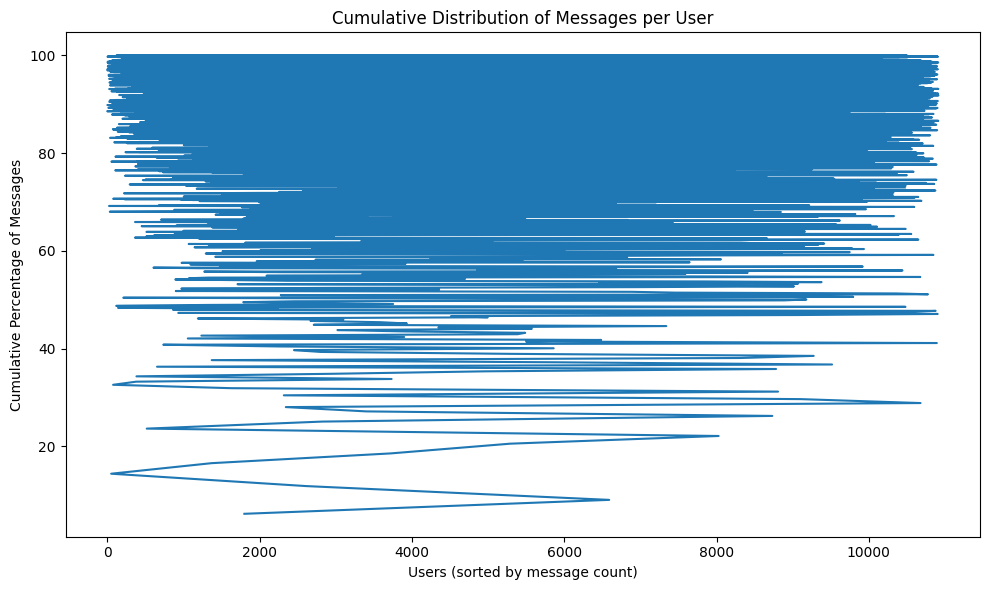

In [90]:
# Sort users by message count
sorted_message_counts = message_count['message_count'].sort_values(ascending=False)

# Compute cumulative percentage
cumulative_percentage = np.cumsum(sorted_message_counts) / sorted_message_counts.sum() * 100

# Plot cumulative distribution
plt.figure(figsize=(10,6))
plt.plot(cumulative_percentage)

# Adding labels and title
plt.xlabel('Users (sorted by message count)')
plt.ylabel('Cumulative Percentage of Messages')
plt.title('Cumulative Distribution of Messages per User')

plt.tight_layout()
plt.show()


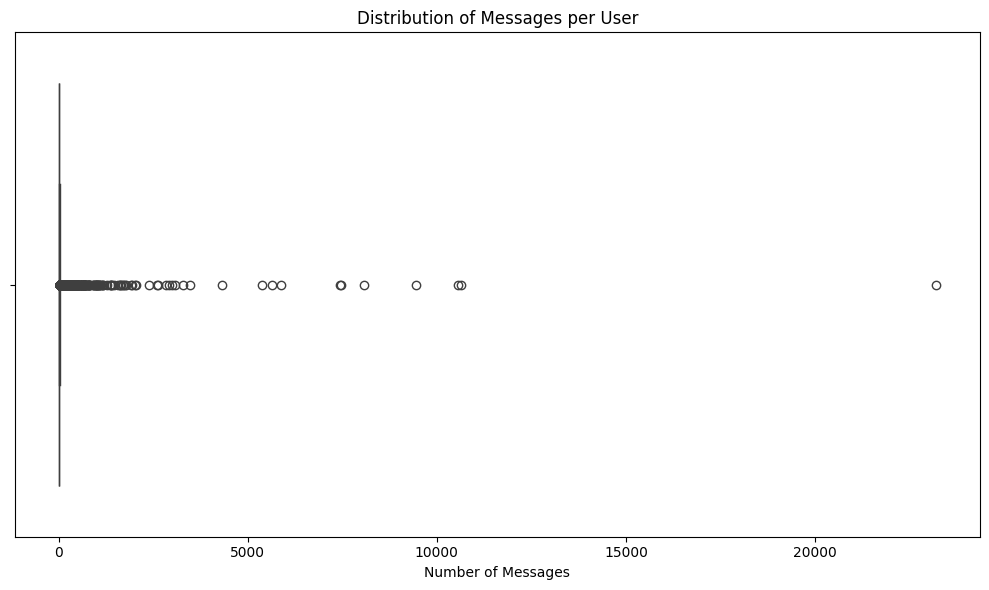

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x=message_count['message_count'])

# Adding labels and title
plt.xlabel('Number of Messages')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()


In [92]:
stream_max = data['stream'].max()+1
ten_p_stream = stream_max /100*33
ten_p_stream = math.floor(ten_p_stream)
ten_p_stream

38

In [93]:
# Step 1: Group by user and calculate the number of messages per user
message_count = data.groupby('user').size().reset_index(name='message_count')

# Step 2: Group by user and calculate the number of unique streams each user has participated in
unique_stream_count = data.groupby('user')['stream'].nunique().reset_index(name='unique_stream_count')

# Step 3: Merge both DataFrames on 'user'
user_stats = pd.merge(message_count, unique_stream_count, on='user')


# Step 4: Filter users who either sent more than 50 messages or participated in at least 3 different streams
filtered_data = user_stats[(user_stats['message_count'] > 100) & (user_stats['unique_stream_count'] > ten_p_stream)]

# Step 5: Filter original DataFrame to only include rows from filtered users
filtered_users = filtered_data['user']
filtered_message_count = message_count[message_count['user'].isin(filtered_users)]

# Result: 'filtered_data' now contains the rows from users who meet the conditions


In [94]:
top_users['message_count'].describe()

count       20.000000
mean      6210.350000
std       4855.725533
min       2384.000000
25%       2980.750000
50%       4848.500000
75%       7606.000000
max      23204.000000
Name: message_count, dtype: float64

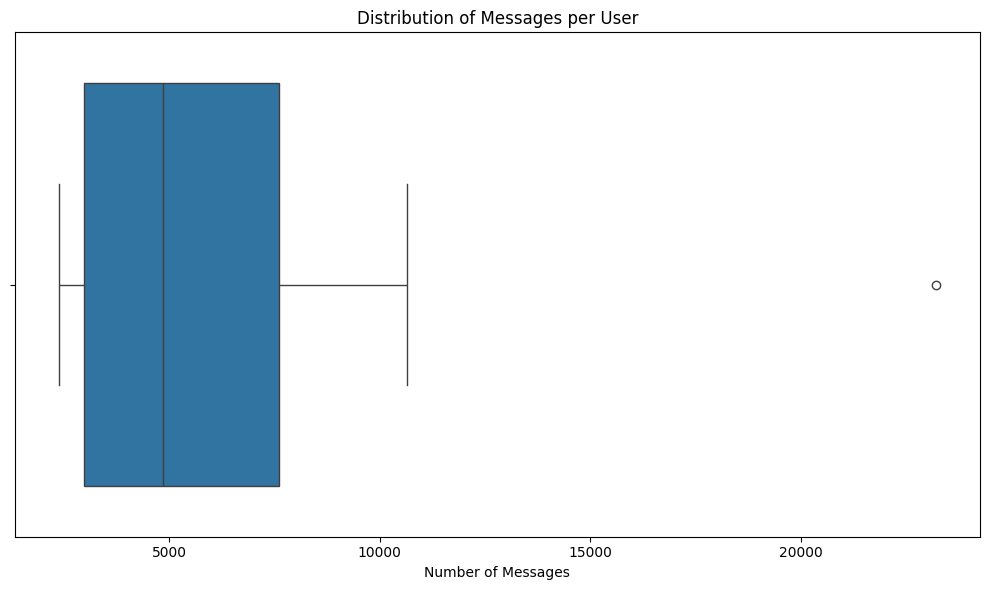

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x=top_users['message_count'])

# Adding labels and title
plt.xlabel('Number of Messages')
plt.title('Distribution of Messages per User')

plt.tight_layout()
plt.show()

In [96]:
#data[data['user']=='NSAPartyVan']